In [ ]:
!pip install -U fastai

In [ ]:
import fastai
import numpy
print("fastai version:", fastai.__version__)
print("NumPy version:", numpy.__version__)

fastai version: 2.8.4
NumPy version: 2.0.2


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [18]:
import zipfile

zip_path = "/content/drive/MyDrive/archive.zip"   # adjust if in a subfolder
extract_path = "/content/chest_xray/chest-xray"

if not os.path.exists(extract_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall("/content")

In [29]:
from pathlib import Path
path = Path("/content/chest_xray/chest_xray")
directories = [item for item in path.iterdir() if item.is_dir()]
display(directories)

[Path('/content/chest_xray/chest_xray/train'),
 Path('/content/chest_xray/chest_xray/val'),
 Path('/content/chest_xray/chest_xray/chest_xray'),
 Path('/content/chest_xray/chest_xray/test'),
 Path('/content/chest_xray/chest_xray/__MACOSX')]

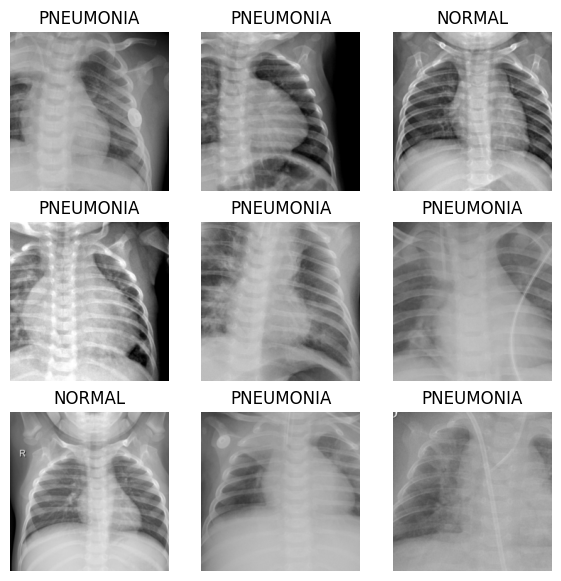

In [21]:
# Import required packages
from fastai.vision.all import *
# Load the data
# fastai expects a folder structure like: train/NORMAL, train/PNEUMONIA
path = Path("/content/chest_xray/chest_xray") # Corrected path
dls = ImageDataLoaders.from_folder(
    path,
    train='train',
    valid='val',
    valid_pct=None,
    item_tfms=Resize(224),
    bs=64
)
dls.show_batch(max_n=9, figsize=(7,7))

In [22]:
# Define and train the model
learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(1)

/usr/local/lib/python3.12/dist-packages/fastai/vision/learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


100%|██████████| 83.3M/83.3M [00:00<00:00, 108MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,0.441299,0.399267,0.812500,19:11


epoch,train_loss,valid_loss,accuracy,time
0,0.135188,0.274387,0.875000,30:20


In [55]:
# Evaluate on test set
test_path = Path("/content/chest_xray/chest_xray/test") # Updated test path
test_dl = dls.test_dl(get_image_files(test_path),with_labels=True)

test_results = learn.validate(dl=test_dl)
print(test_results)

[0.7559583783149719, 0.8141025900840759]


In [75]:
# Try a prediction
from fastai.vision.all import *
from pathlib import Path

test_path = Path("/content/chest_xray/chest_xray/test") # Corrected test path
pneumonia_path = test_path / "PNEUMONIA"

# Get a list of all image files in the PNEUMONIA test directory
pneumonia_files = get_image_files(pneumonia_path)

if len(pneumonia_files) > 0:
    # Pick the first image file from the list
    img_path = pneumonia_files[9]

    # Load the image and convert to RGB to ensure 3 channels
    img = PILImage.create(img_path).convert('RGB')

    # Make a prediction
    # learn.predict handles resizing and tensor conversion internally
    pred, pred_idx, probs = learn.predict(img)

    print(f"Prediction: {pred}, Probability: {probs[pred_idx]:.4f}")
else:
    print(f"No image files found in {pneumonia_path}")

Prediction: PNEUMONIA, Probability: 0.9982
